In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.integrate as integrate
sym.init_printing()

In [8]:
def w(w1):

    x=w1[0]
    y=w1[1]
    z=w1[2]
    
    
    F=np.empty(3)
    F[0]=x**2+y**2-20
    F[1]=y-x**2
    F[2]=z-x*y+5
    
    return F
zGuess=np.array([1,1,1])
w2=fsolve(w,zGuess)
w2

array([2., 4., 3.])

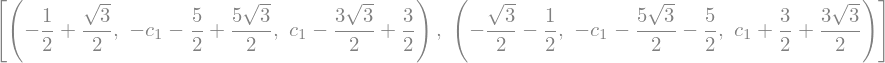

In [11]:
x,y,z=sym.symbols('x,y,z')
c1=sym.Symbol('c1')

f=sym.Eq(2*x**2+y+z,1)
g=sym.Eq(x+2*x+z,c1)
h=sym.Eq(-2*x+y,-z)

t=sym.solve([f,g,h],(x,y,z))
t

In [16]:
f=lambda x: (x**2-1)**3
b=integrate.quad(f,-np.inf,np.inf)[0]
b

/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


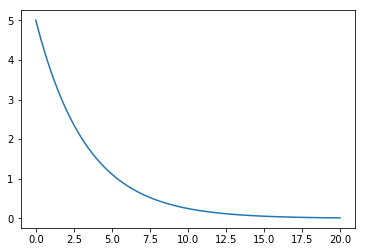

In [21]:
from scipy.integrate import odeint


def Odd(y,t):
    k=0.3
    dydt=-k*y
    return dydt

y_=5
a=0
b=20
N=100
t=np.linspace(a,b,N)
w=odeint(Odd,y_,t)
#print(w)
y=w[:,0]
plt.plot(t,y)
    

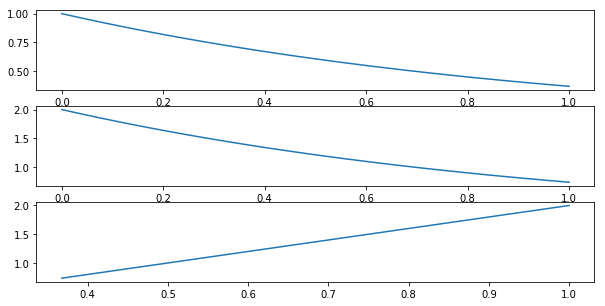

In [26]:
def Odet(z,t):
    x,y=z
    dxdt=5*x-3*y
    dydt=-6*x+2*y
    return dxdt,dydt


x0y0=[1,2]
a=0
b=1
N=100
t=np.linspace(a,b,N)
w=odeint(Odet,x0y0,t)
x=w[:,0]
y=w[:,1]
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,1,2)
plt.plot(t,y)

plt.subplot(3,1,3)
plt.plot(x,y)

plt.show()

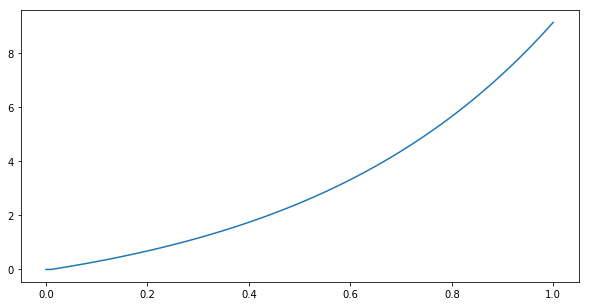

In [35]:
#the generalized Euler method

def Egeneralized(f,z_,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(z_)
    z=np.zeros((N,M))
    z[0]=z_
    
    for k in range(1,N-1):
        z[k+1]=z[k]+H*f(z[k],t[k])
    return z

def f2(w,t):
    x,y,z=w
    dxdt=2*x +3
    dydt=2*y+4
    dzdt=x**2+1
    return np.array([dxdt,dydt,dzdt])

z_=[0,1,2]
a=0
b=1
N=100
t=np.linspace(a,b,N)
w2=Egeneralized(f2,z_,t)
x=w2[:,0]
y=w2[:,1]
z=w2[:,2]
plt.figure(figsize=(10,5))
plt.plot(t,x)
# plt.plot(t,y)
# plt.plot(x,y)

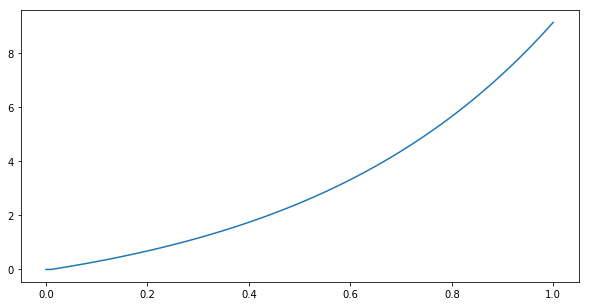

In [36]:
def RK2(p,z_,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(z_)
    z=np.zeros((N,M))
    z[0]=z_
    
    for k in range(1,N-1):
        a=p(z[i],t[i])
        z[k+1]=z[k]+H*p(z[k]+(H/2*a),t[k]+H/2)
    return z
def f2(w,t):
    x,y,z=w
    dxdt=2*x +3
    dydt=2*y+4
    dzdt=x**2+1
    return np.array([dxdt,dydt,dzdt])
z_=[0,1,2]
a=0
b=1
N=100
t=np.linspace(a,b,N)
w2=Egeneralized(f2,z_,t)
x=w2[:,0]
y=w2[:,1]
z=w2[:,2]
plt.figure(figsize=(10,5))
plt.plot(t,x)


In [104]:
def Euler(f,a,b,c,N):
    H=(b-a)/N
    y=np.zeros(N+1)
    x=np.linspace(a,b,N+1)
    y[0]=c
    
    for k in range(1,N+1):
        y[k]=y[k-1]+H*f(x[k-1],y[k-1])
    return x,y

def Rk2(f,a,b,c,N):
    H=(b-a)/N
    y=np.zeros(N+1)
    x=np.linspace(a,b,N+1)
    y[0]=c
    
    for k in range(1,N+1):
        d=f(x[k-1],y[k-1])
        y[k]=y[k-1]+H*f(x[k-1]+H/2,y[k-1]+H/2*d)
    return x,y

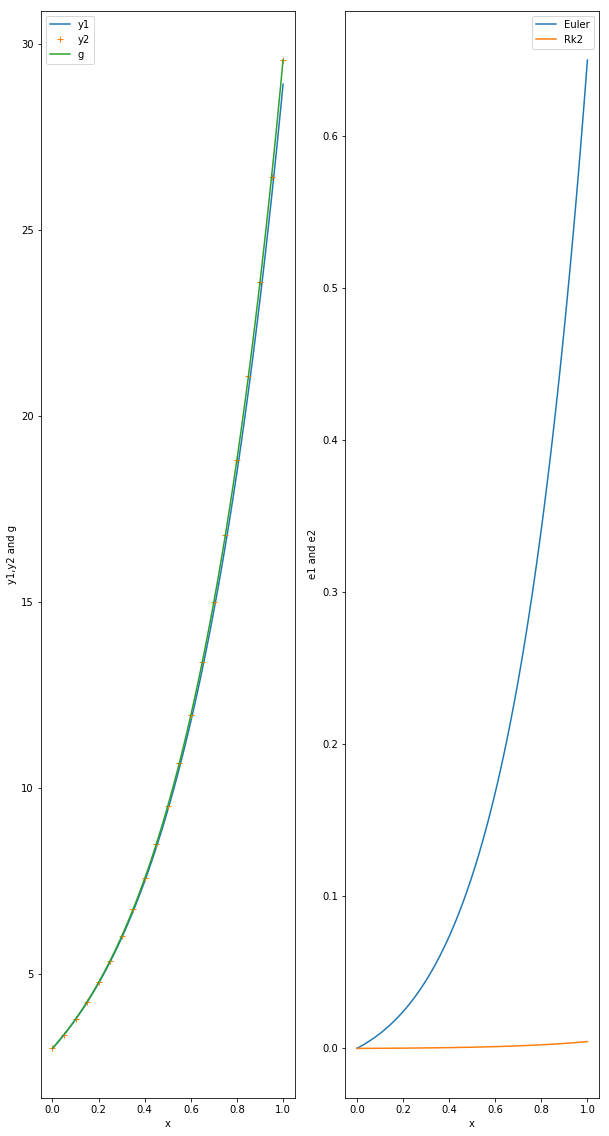

In [118]:
a=0
b=1
c=3
N=100
x=np.linspace(a,b,N+1)
f=lambda x,y: 2*y + np.exp(2*x)
f1=lambda x: (x + 3)*np.exp(2*x)


x,y1=Euler(f,a,b,c,N)
x,y2=Rk2(f,a,b,c,N)
g=f1(x)
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.plot(x,y1)
plt.plot(x[::5],y2[::5],'+')
plt.plot(x,g)
plt.xlabel('x')
plt.ylabel('y1,y2 and g')
plt.legend(['y1','y2','g'])


e1=abs(g-y1)
e2=abs(g-y2)
plt.subplot(1,2,2)
plt.plot(x,e1)
plt.plot(x,e2)
plt.xlabel('x')
plt.ylabel('e1 and e2')
plt.legend(['Euler','Rk2'])